**Housing price is a real-world problem that is important to many people, whether they are buying or selling a home, or simply interested in the housing market. Building a regression model to predict housing prices is a practical application of machine learning**

**Housing price is a commonly used dataset in machine learning, especially in the field of regression, where the goal is to predict a continuous numerical output. The importance of housing price in machine learning lies in its usefulness as a benchmark dataset for building and testing regression models.**

The data set used in this project is Boston House Prices, which is available on [Boston Housing data](http://lib.stat.cmu.edu/datasets/boston
)

The major aim of this project is to predict the house prices based on the features by using some of the most common Machine Learning Algoeithms such as the following: 

1. Linear Regression

2. Random Forest Regressor

First, all the libraries we are going to use are imported.



In [ ]:
# Importing the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the Boston Housing dataset

data = pd.read_csv('housing.csv')
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [ ]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=columns)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Understanding the dataset**

Check the description

**This Dataset consist several features such as Number of Rooms, Crime Rate, and Tax and so on.**

**The target in this case “prices” is the last column in the dataset called 'medv'**



# Basic Analysis

Checking the shape of the data also checking for missing values


In [ ]:
#Shape of dataset
print("Shape of Training dataset:", boston.shape)

# Checking null values for training dataset
boston.isnull().sum()

Shape of Training dataset: (506, 14)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Since all of the columns are 0, that means the dataset has no missing values.

The target variable is the last column called 'MEDV'. Thus, lets rename it to 'PRICE'.

In [ ]:
boston.rename(columns={'MEDV':'PRICE'}, inplace=True)


In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


'MEDV'has been renamed as 'PRICE'.

#Summarizing the stats of the data


In [ ]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#**Exploratory Data Analysis**

Exploratory Data Analysis is done to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

In [ ]:
# Information about the dataset features
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## **Correlation**

The goal is to find out how the independent features and the output features are correlated.

Correlation: strength of association between two variables

By default excludes all missing values. By default does Pearson correlation (used in numerical values)

In [ ]:
corr = boston.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

# Plotting the heatmap of correlation between the numerical features

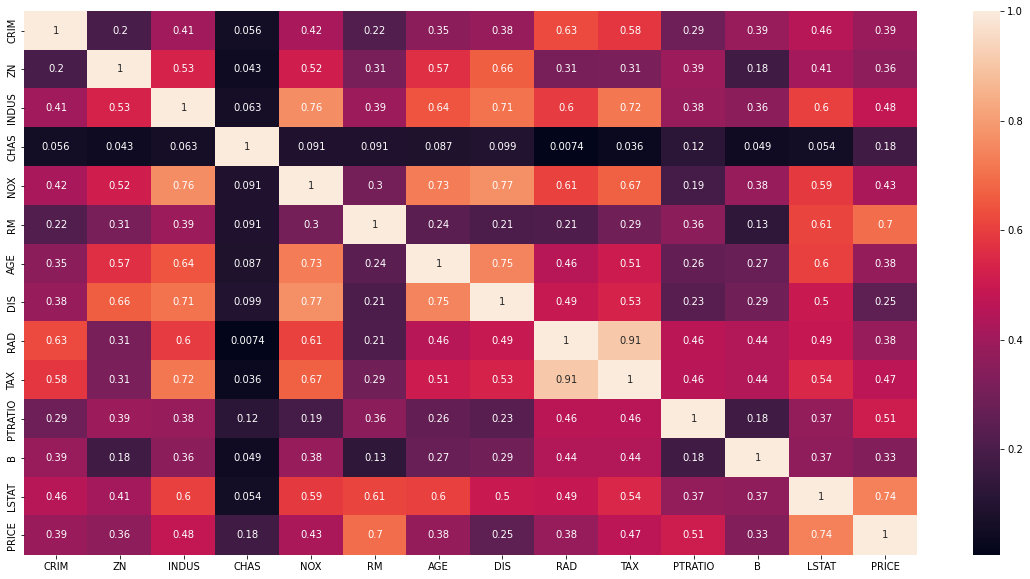

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr().abs(),  annot=True)

The by default correlation, in this case, is the pearson correlation Basically, it checks the relationship between two feature x and y in a way that it tries to say whether it is highly positively correlated, negatively correlated, or not correlated at all. Usually, the output ranges from -1 to 1

If the value is near -1 , the more negatively correlated the features are
If the value is near +1, the more positively correlated the features are
And if it is near to 0 , they are hardly correlated.
We are going to check two types of correlation here

Correlation between independent features
Correlation between independent and dependent features
If there is a high correlation between independent features, we can remove one of the features, this is known as multi-collinearity:


**Feature Selection**

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. 

In [ ]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = boston.iloc[:,0:13] #independent columns
y = boston.iloc[:,-1] #target column i.e price range

To identify the best features for the target variables, the target variable should be int Values. Thus, 'price' is rounded off.

In [ ]:
Y = np.round(boston['PRICE'])

In [ ]:
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
bostonscores = pd.DataFrame(fit.scores_)
bostoncolumns = pd.DataFrame(X.columns)

In [ ]:
# Concat two dataframes for better visualization
featureScores = pd.concat([bostoncolumns,bostonscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [ ]:
print(featureScores.nlargest(5,'Score')) #print 5 best features



   Specs         Score
9    TAX  14817.836927
1     ZN   5937.859414
0   CRIM   5503.817133
11     B   3340.486412
6    AGE   2424.308937


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.11375289 0.02391676 0.04144675 0.01454347 0.06779146 0.14005537
 0.11614996 0.10692527 0.03553332 0.04390985 0.04646763 0.10812352
 0.14138374]


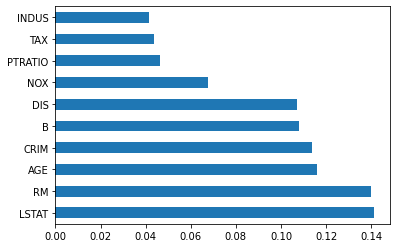

In [ ]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### **Model Fitting**

# Linear Regression

 

In [ ]:
#Assigning the values

X = boston.iloc[: , 0:13]
Y = boston.iloc[: , -1]

In [ ]:
# Splitting the training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_train)

In [ ]:
print('Training Accuracy: ', model.score(X_train, Y_train)*100)

Training Accuracy:  77.30135569264233


In [ ]:
# Training Accuracy test prediction

print('Testing Accuracy: ', model.score(X_test, Y_test)*100)

Testing Accuracy:  58.92223849182526


Model Prediction

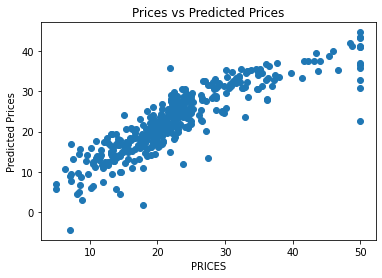

In [ ]:
plt.scatter(Y_train, Y_pred)
plt.xlabel('PRICES')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices')
plt.show()

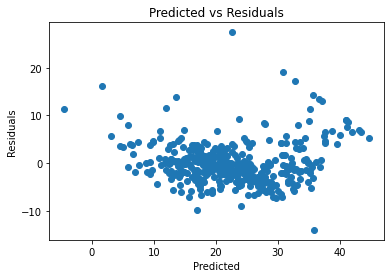

In [ ]:
# Checking residuals

plt.scatter(Y_pred, Y_train - Y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()


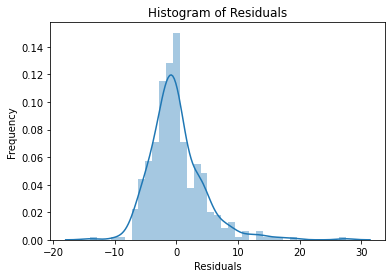

In [ ]:
# Checking Normality of errors

sns.distplot(Y_train - Y_pred)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


**Random Forest Regressor**

In [ ]:
#Assigning the values

X = boston.iloc[: , [-1,5,10,4,9]]
Y = boston.iloc[: , -1]

In [ ]:
# Splitting the training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=0)

In [ ]:
from sklearn.linear_model import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)

ImportError: ignored

In [ ]:
Y_pred = reg.predict(X_train)

NameError: ignored

In [ ]:
print('Training Accuracy: ', model.score(X_train, Y_train)*100)

ValueError: ignored

In [ ]:
print('Testing Accuracy: ', model.score(X_test, Y_test)*100)

ValueError: ignored

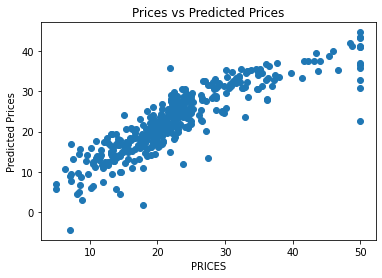

In [ ]:
plt.scatter(Y_train, Y_pred)
plt.xlabel('PRICES')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices')
plt.show()

Linear Regression

Model Score: 73.1% Accuracy

Training Accuracy: 72.9% Accuracy

Testing Accuracy: 73.1% Accuracy

Random Forest Regressor

Training Accuracy: 99.9% Accuracy.

Testing Accuracy: 99.8% Accuracy

Output & Conclusion

From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. Also, it can be seen from the evaluation of three models that Random Forest Regressor performed better than Linear Regression.